In [2]:
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import DataLoader
from dl_utils.utils.dataset import viz_dataloader, split_train_valid, hdf5_dataset
from dl_utils.training.build_model import resnet50_, fpn_resnet50_classification
from dl_utils.training.trainer import Trainer, accuracy
from dl_utils.packed_functions import benchmark_task

ds_path_info = {'imagenet': '../../datasets/imagenet_v5_rot_10m_fix_vector.h5',
                'noise': '../../datasets/noise_v5_rot_1m_fix_vector.h5',
                'atom': '../../datasets/atom_v5_rot_1m_fix_vector.h5',
                'viz_dataloader': False}

training_specs = {'batch_size': 1200, 
                  'num_workers': 12, 
                  'device_ids': [5,6], 
                  'shuffle': True,
                  'learning_rate': 1e-3,
                  'epochs': 1000,
                  'validation_times': 200,
                  'training_image_count': 10000000*20, # 20 epochs of 10 million images of full imagenet dataset
                  'efficient_print': True,
                  'model_path': '../../models/ResNet50/',
}

config = {'loss_func': 'CrossEntropyLoss', # nn.MSELoss()
          'optimizer': 'Adam',
          'scheduler': 'OneCycleLR'}
    
wandb_specs = {'config': config,
                'project': 'Understanding-Experimental-Images-by-Identifying-Symmetries-with-Deep-Learning',
                'entity': 'yig319',
                'group': 'benchmark',
                'save_code': True,
                'resume': 'allow'}

model = resnet50_(in_channels=3, n_classes=17)
task_name = '03132025-ResNet50-benchmark'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
!which python

/mnt/scratch/home/yichen/anaconda3/envs/symmetry/bin/python


In [9]:
import os
print(os.getcwd())


/scratch/home/yichen/Understanding-Experimental-Images-by-Identifying-Symmetries-with-Deep-Learning/notebooks/benchmark


In [8]:
import os
os.chdir('/scratch/home/yichen/Understanding-Experimental-Images-by-Identifying-Symmetries-with-Deep-Learning/notebooks/benchmark/')

### full size dataset - 10 million

In [2]:
model.load_state_dict(torch.load('../../models/ResNet50/09112024-resnet50-dataset_v5_size-10m/model_epoch_20.pth', weights_only=True, map_location=torch.device('cpu')))

training_specs['epoch_start'] = 15
training_specs['ds_size'] = 10000000
training_specs['folder_name'] = '09112024-resnet50-dataset_v5_size-10m'

model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: yig319 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


[15, 16, 17, 18, 19, 20, 21, 22, 23]
Epoch: 16/24


Train: 100%|██████████| 4522/4522 [1:47:18<00:00,  1.42s/it]


train_loss: 0.0434, train_accuracy: 98.56%


Valid: 100%|██████████| 1131/1131 [17:12<00:00,  1.10it/s]


valid_loss: 0.0430, valid_accuracy: 98.47%
Model saved at epoch 15
Saved new best model at epoch 15 with valid dataset


Valid: 100%|██████████| 557/557 [08:07<00:00,  1.14it/s]


noise_loss: 0.1400, noise_accuracy: 94.77%


Valid: 100%|██████████| 557/557 [07:57<00:00,  1.17it/s]


atom_loss: 0.6912, atom_accuracy: 84.88%
Model saved at epoch 16
Epoch: 17/24


Train: 100%|██████████| 4522/4522 [1:48:29<00:00,  1.44s/it]


train_loss: 0.0487, train_accuracy: 98.37%


Valid: 100%|██████████| 1131/1131 [17:43<00:00,  1.06it/s]


valid_loss: 0.0483, valid_accuracy: 98.28%


Valid: 100%|██████████| 557/557 [08:41<00:00,  1.07it/s]


noise_loss: 0.1848, noise_accuracy: 93.07%


Valid: 100%|██████████| 557/557 [08:34<00:00,  1.08it/s]


atom_loss: 0.7380, atom_accuracy: 83.46%
Model saved at epoch 17
Epoch: 18/24


Train: 100%|██████████| 4522/4522 [1:47:18<00:00,  1.42s/it]


train_loss: 0.0506, train_accuracy: 98.29%


Valid: 100%|██████████| 1131/1131 [16:39<00:00,  1.13it/s]


valid_loss: 0.0482, valid_accuracy: 98.30%


Valid: 100%|██████████| 557/557 [08:15<00:00,  1.12it/s]


noise_loss: 0.1707, noise_accuracy: 93.66%


Valid: 100%|██████████| 557/557 [08:19<00:00,  1.11it/s]


atom_loss: 1.0097, atom_accuracy: 79.46%
Model saved at epoch 18
Epoch: 19/24


Train: 100%|██████████| 4522/4522 [1:46:29<00:00,  1.41s/it]


train_loss: 0.0470, train_accuracy: 98.39%


Valid: 100%|██████████| 1131/1131 [16:57<00:00,  1.11it/s]


valid_loss: 0.0432, valid_accuracy: 98.45%


Valid: 100%|██████████| 557/557 [08:14<00:00,  1.13it/s]


noise_loss: 0.1613, noise_accuracy: 94.21%


Valid: 100%|██████████| 557/557 [08:15<00:00,  1.12it/s]


atom_loss: 0.6173, atom_accuracy: 84.71%
Model saved at epoch 19
Epoch: 20/24


Train: 100%|██████████| 4522/4522 [1:47:43<00:00,  1.43s/it]


train_loss: 0.0434, train_accuracy: 98.49%


Valid: 100%|██████████| 1131/1131 [16:49<00:00,  1.12it/s]


valid_loss: 0.0411, valid_accuracy: 98.51%
Model saved at epoch 19
Saved new best model at epoch 19 with valid dataset


Valid: 100%|██████████| 557/557 [08:13<00:00,  1.13it/s]


noise_loss: 0.1240, noise_accuracy: 95.47%


Valid: 100%|██████████| 557/557 [08:20<00:00,  1.11it/s]


atom_loss: 0.9196, atom_accuracy: 84.98%
Model saved at epoch 20
Epoch: 21/24


Train: 100%|██████████| 4522/4522 [1:47:46<00:00,  1.43s/it]


train_loss: 0.0400, train_accuracy: 98.59%


Valid: 100%|██████████| 1131/1131 [17:07<00:00,  1.10it/s]


valid_loss: 0.0393, valid_accuracy: 98.57%
Model saved at epoch 20
Saved new best model at epoch 20 with valid dataset


Valid: 100%|██████████| 557/557 [08:30<00:00,  1.09it/s]


noise_loss: 0.1300, noise_accuracy: 95.49%


Valid: 100%|██████████| 557/557 [08:37<00:00,  1.08it/s]


atom_loss: 0.8409, atom_accuracy: 87.20%
Model saved at epoch 21
Epoch: 22/24


Train: 100%|██████████| 4522/4522 [1:50:15<00:00,  1.46s/it]


train_loss: 0.0371, train_accuracy: 98.67%


Valid: 100%|██████████| 1131/1131 [17:39<00:00,  1.07it/s]


valid_loss: 0.0374, valid_accuracy: 98.64%
Model saved at epoch 21
Saved new best model at epoch 21 with valid dataset


Valid: 100%|██████████| 557/557 [08:25<00:00,  1.10it/s]


noise_loss: 0.1149, noise_accuracy: 96.25%


Valid: 100%|██████████| 557/557 [08:27<00:00,  1.10it/s]


atom_loss: 0.9669, atom_accuracy: 86.31%
Model saved at epoch 22
Epoch: 23/24


Train: 100%|██████████| 4522/4522 [1:46:11<00:00,  1.41s/it]


train_loss: 0.0349, train_accuracy: 98.74%


Valid: 100%|██████████| 1131/1131 [17:04<00:00,  1.10it/s]


valid_loss: 0.0368, valid_accuracy: 98.67%
Model saved at epoch 22
Saved new best model at epoch 22 with valid dataset


Valid: 100%|██████████| 557/557 [08:01<00:00,  1.16it/s]


noise_loss: 0.1342, noise_accuracy: 96.19%


Valid: 100%|██████████| 557/557 [07:45<00:00,  1.20it/s]


atom_loss: 0.9798, atom_accuracy: 88.38%
Model saved at epoch 23
Epoch: 24/24


Train:  30%|██▉       | 1345/4522 [31:29<1:14:22,  1.40s/it]


KeyboardInterrupt: 

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f2283fe9950>> (for post_run_cell), with arguments args (<ExecutionResult object at 7f2287838dd0, execution_count=2 error_before_exec=None error_in_exec= info=<ExecutionInfo object at 7f2289766ed0, raw_cell="model.load_state_dict(torch.load('../../models/Res.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell://ssh-remote%2Bm3kube.urcf.drexel.edu/mnt/scratch/home/yichen/Understanding-Experimental-Images-by-Identifying-Symmetries-with-Deep-Learning/notebooks/benchmark/ResNet50-training.ipynb#W2sdnNjb2RlLXJlbW90ZQ%3D%3D> result=None>,),kwargs {}:


MailboxClosedError: 

In [2]:
training_specs['ds_size'] = 10000000
training_specs['folder_name'] = task_name + '-10m'
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: yig319 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Epoch: 1/24


Train:   2%|▏         | 76/4522 [01:52<1:49:43,  1.48s/it]


KeyboardInterrupt: 

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f2baebdfed0>> (for post_run_cell), with arguments args (<ExecutionResult object at 7f2dc75bc8d0, execution_count=2 error_before_exec=None error_in_exec= info=<ExecutionInfo object at 7f2dc7399810, raw_cell="training_specs['ds_size'] = 10000000
training_spec.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell://ssh-remote%2Bm3kube.urcf.drexel.edu/mnt/scratch/home/yichen/Understanding-Experimental-Images-by-Identifying-Symmetries-with-Deep-Learning/notebooks/benchmark/ResNet50-training.ipynb#W3sdnNjb2RlLXJlbW90ZQ%3D%3D> result=None>,),kwargs {}:


MailboxClosedError: 

### 1K training dataset size 

In [ ]:
training_specs['ds_size'] = 1000
training_specs['folder_name'] = task_name + '-1k'
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 5k dataset

In [ ]:
training_specs['ds_size'] = 5000
training_specs['folder_name'] = task_name + '-5k'
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 10K dataset

10711


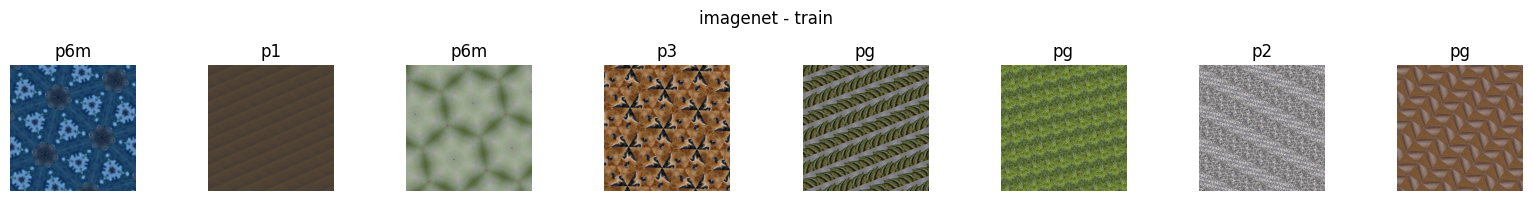

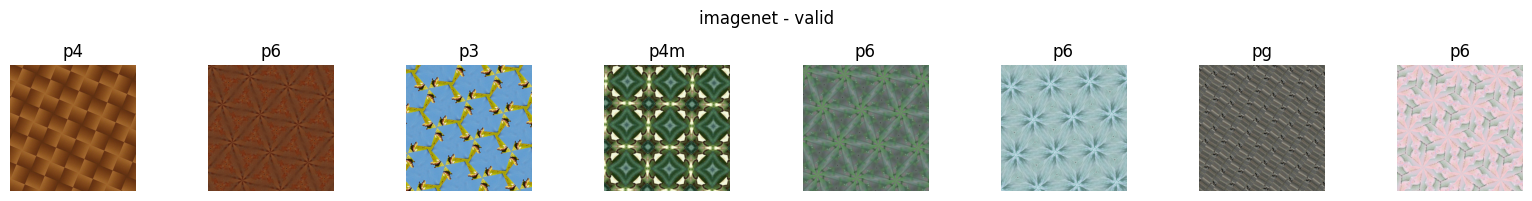

In [ ]:
training_specs['ds_size'] = 10000
training_specs['folder_name'] = task_name + '-10k'
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 50k dataset

In [ ]:
training_specs['ds_size'] = 50000
training_specs['folder_name'] = task_name + '-50k'
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 100K dataset

In [ ]:
training_specs['ds_size'] = 100000
training_specs['folder_name'] = task_name + '-100k'
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 500K dataset

In [ ]:
training_specs['ds_size'] = 500000
training_specs['folder_name'] = task_name + '-500k'
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 1 million dataset

In [ ]:
training_specs['ds_size'] = 1000000
training_specs['folder_name'] = task_name + '-1m'
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 2 million dataset

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: yig319 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Epoch: 1/100


Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1112/1112 [25:29<00:00,  1.38s/it]


train_loss: 2.7592, train_accuracy: 10.88%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 278/278 [04:00<00:00,  1.16it/s]


valid_loss: 1.9784, valid_accuracy: 32.67%
Model saved at epoch 0
Saved new best model at epoch 0 with valid dataset


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [08:00<00:00,  1.16it/s]


noise_loss: 3.8779, noise_accuracy: 6.25%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [08:05<00:00,  1.15it/s]


atom_loss: 2.4170, atom_accuracy: 20.72%
Model saved at epoch 1
Epoch: 2/100


Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1112/1112 [24:25<00:00,  1.32s/it]


train_loss: 1.4049, train_accuracy: 50.23%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 278/278 [03:48<00:00,  1.22it/s]


valid_loss: 0.8850, valid_accuracy: 68.08%
Model saved at epoch 1
Saved new best model at epoch 1 with valid dataset


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:32<00:00,  1.23it/s]


noise_loss: 2.8730, noise_accuracy: 7.04%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:36<00:00,  1.22it/s]


atom_loss: 1.4850, atom_accuracy: 48.56%
Model saved at epoch 2
Epoch: 3/100


Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1112/1112 [24:51<00:00,  1.34s/it]


train_loss: 0.7783, train_accuracy: 72.59%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 278/278 [03:54<00:00,  1.18it/s]


valid_loss: 0.5747, valid_accuracy: 78.42%
Model saved at epoch 2
Saved new best model at epoch 2 with valid dataset


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:50<00:00,  1.18it/s]


noise_loss: 2.9473, noise_accuracy: 11.42%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:49<00:00,  1.19it/s]


atom_loss: 1.3795, atom_accuracy: 55.69%
Model saved at epoch 3
Epoch: 4/100


Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1112/1112 [25:09<00:00,  1.36s/it]


train_loss: 0.5362, train_accuracy: 81.14%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 278/278 [04:00<00:00,  1.16it/s]


valid_loss: 0.4326, valid_accuracy: 84.00%
Model saved at epoch 3
Saved new best model at epoch 3 with valid dataset


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:57<00:00,  1.17it/s]


noise_loss: 2.8844, noise_accuracy: 10.53%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:46<00:00,  1.19it/s]


atom_loss: 1.3274, atom_accuracy: 58.94%
Model saved at epoch 4
Epoch: 5/100


Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1112/1112 [26:03<00:00,  1.41s/it]


train_loss: 0.3893, train_accuracy: 86.77%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 278/278 [04:04<00:00,  1.14it/s]


valid_loss: 0.3185, valid_accuracy: 88.94%
Model saved at epoch 4
Saved new best model at epoch 4 with valid dataset


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:43<00:00,  1.20it/s]


noise_loss: 2.6276, noise_accuracy: 24.14%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:40<00:00,  1.21it/s]


atom_loss: 1.8234, atom_accuracy: 55.11%
Model saved at epoch 5
Epoch: 6/100


Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1112/1112 [24:55<00:00,  1.34s/it]


train_loss: 0.2879, train_accuracy: 90.39%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 278/278 [03:43<00:00,  1.24it/s]


valid_loss: 0.3009, valid_accuracy: 90.55%
Model saved at epoch 5
Saved new best model at epoch 5 with valid dataset


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:34<00:00,  1.23it/s]


noise_loss: 1.9532, noise_accuracy: 37.47%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [08:01<00:00,  1.16it/s]


atom_loss: 1.6125, atom_accuracy: 61.93%
Model saved at epoch 6
Epoch: 7/100


Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1112/1112 [24:50<00:00,  1.34s/it]


train_loss: 0.2242, train_accuracy: 92.60%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 278/278 [03:52<00:00,  1.20it/s]


valid_loss: 0.2204, valid_accuracy: 93.07%
Model saved at epoch 6
Saved new best model at epoch 6 with valid dataset


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:37<00:00,  1.22it/s]


noise_loss: 1.6956, noise_accuracy: 44.27%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:45<00:00,  1.20it/s]


atom_loss: 1.1316, atom_accuracy: 72.11%
Model saved at epoch 7
Epoch: 8/100


Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1112/1112 [24:56<00:00,  1.35s/it]


train_loss: 0.1801, train_accuracy: 94.12%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 278/278 [03:54<00:00,  1.19it/s]


valid_loss: 0.1786, valid_accuracy: 93.95%
Model saved at epoch 7
Saved new best model at epoch 7 with valid dataset


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:45<00:00,  1.20it/s]


noise_loss: 1.3546, noise_accuracy: 55.12%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:42<00:00,  1.20it/s]


atom_loss: 1.0462, atom_accuracy: 75.39%
Model saved at epoch 8
Epoch: 9/100


Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1112/1112 [24:50<00:00,  1.34s/it]


train_loss: 0.1512, train_accuracy: 95.12%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 278/278 [03:54<00:00,  1.19it/s]


valid_loss: 0.1465, valid_accuracy: 95.10%
Model saved at epoch 8
Saved new best model at epoch 8 with valid dataset


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:42<00:00,  1.20it/s]


noise_loss: 1.2359, noise_accuracy: 59.37%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:41<00:00,  1.21it/s]


atom_loss: 1.2469, atom_accuracy: 71.52%
Model saved at epoch 9
Epoch: 10/100


Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1112/1112 [25:03<00:00,  1.35s/it]


train_loss: 0.1312, train_accuracy: 95.85%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 278/278 [03:53<00:00,  1.19it/s]


valid_loss: 0.1881, valid_accuracy: 93.70%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:43<00:00,  1.20it/s]


noise_loss: 1.4396, noise_accuracy: 55.16%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:39<00:00,  1.21it/s]


atom_loss: 1.5913, atom_accuracy: 64.61%
Model saved at epoch 10
Epoch: 11/100


Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1112/1112 [24:48<00:00,  1.34s/it]


train_loss: 0.1163, train_accuracy: 96.34%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 278/278 [03:54<00:00,  1.18it/s]


valid_loss: 0.1326, valid_accuracy: 95.59%
Model saved at epoch 10
Saved new best model at epoch 10 with valid dataset


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:43<00:00,  1.20it/s]


noise_loss: 1.0098, noise_accuracy: 68.30%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:42<00:00,  1.20it/s]


atom_loss: 1.3244, atom_accuracy: 72.49%
Model saved at epoch 11
Epoch: 12/100


Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1112/1112 [24:55<00:00,  1.34s/it]


train_loss: 0.1063, train_accuracy: 96.65%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 278/278 [03:54<00:00,  1.19it/s]


valid_loss: 0.1299, valid_accuracy: 95.77%
Model saved at epoch 11
Saved new best model at epoch 11 with valid dataset


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:45<00:00,  1.20it/s]


noise_loss: 1.0906, noise_accuracy: 65.67%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:43<00:00,  1.20it/s]


atom_loss: 1.1993, atom_accuracy: 74.54%
Model saved at epoch 12
Epoch: 13/100


Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1112/1112 [24:49<00:00,  1.34s/it]


train_loss: 0.0980, train_accuracy: 96.90%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 278/278 [03:53<00:00,  1.19it/s]


valid_loss: 0.1028, valid_accuracy: 96.56%
Model saved at epoch 12
Saved new best model at epoch 12 with valid dataset


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [08:14<00:00,  1.13it/s]


noise_loss: 0.7368, noise_accuracy: 74.92%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [08:21<00:00,  1.11it/s]


atom_loss: 1.1856, atom_accuracy: 74.95%
Model saved at epoch 13
Epoch: 14/100


Train: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1112/1112 [24:50<00:00,  1.34s/it]


train_loss: 0.0925, train_accuracy: 97.06%


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 278/278 [03:53<00:00,  1.19it/s]


valid_loss: 0.0993, valid_accuracy: 96.73%
Model saved at epoch 13
Saved new best model at epoch 13 with valid dataset


Valid: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [07:54<00:00,  1.17it/s]


noise_loss: 0.5456, noise_accuracy: 81.51%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:55<00:00,  1.17it/s]


atom_loss: 1.4763, atom_accuracy: 70.89%
Model saved at epoch 14
Epoch: 15/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:31<00:00,  1.38s/it]


train_loss: 0.0880, train_accuracy: 97.19%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [03:56<00:00,  1.17it/s]


valid_loss: 0.0959, valid_accuracy: 96.80%
Model saved at epoch 14
Saved new best model at epoch 14 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:53<00:00,  1.18it/s]


noise_loss: 0.5072, noise_accuracy: 82.83%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:42<00:00,  1.20it/s]


atom_loss: 1.0267, atom_accuracy: 77.43%
Model saved at epoch 15
Epoch: 16/100


Train:  11%|████████▎                                                                | 126/1112 [02:49<21:43,  1.32s/it]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:31<00:00,  1.38s/it]


train_loss: 0.0541, train_accuracy: 98.17%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [03:55<00:00,  1.18it/s]


valid_loss: 0.0594, valid_accuracy: 97.97%
Model saved at epoch 25
Saved new best model at epoch 25 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:47<00:00,  1.19it/s]


noise_loss: 0.2777, noise_accuracy: 91.82%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:26<00:00,  1.25it/s]


atom_loss: 1.1530, atom_accuracy: 77.16%
Model saved at epoch 26
Epoch: 27/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:09<00:00,  1.36s/it]


train_loss: 0.0523, train_accuracy: 98.22%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [03:56<00:00,  1.18it/s]


valid_loss: 0.0615, valid_accuracy: 97.91%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:49<00:00,  1.19it/s]


noise_loss: 0.3709, noise_accuracy: 89.96%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:30<00:00,  1.24it/s]


atom_loss: 1.3731, atom_accuracy: 76.26%
Model saved at epoch 27
Epoch: 28/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:14<00:00,  1.36s/it]


train_loss: 0.0502, train_accuracy: 98.29%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [03:49<00:00,  1.21it/s]


valid_loss: 0.0616, valid_accuracy: 97.95%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:45<00:00,  1.20it/s]


noise_loss: 0.2708, noise_accuracy: 91.70%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:48<00:00,  1.19it/s]


atom_loss: 1.1440, atom_accuracy: 79.52%
Model saved at epoch 28
Epoch: 29/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:03<00:00,  1.35s/it]


train_loss: 0.0494, train_accuracy: 98.31%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [03:45<00:00,  1.23it/s]


valid_loss: 0.0634, valid_accuracy: 97.93%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:49<00:00,  1.19it/s]


noise_loss: 0.2387, noise_accuracy: 93.01%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:50<00:00,  1.18it/s]


atom_loss: 1.4063, atom_accuracy: 76.36%
Model saved at epoch 29
Epoch: 30/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [24:34<00:00,  1.33s/it]


train_loss: 0.0478, train_accuracy: 98.36%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:00<00:00,  1.16it/s]


valid_loss: 0.0628, valid_accuracy: 97.93%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:41<00:00,  1.21it/s]


noise_loss: 0.2836, noise_accuracy: 92.31%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:53<00:00,  1.18it/s]


atom_loss: 1.5401, atom_accuracy: 75.22%
Model saved at epoch 30
Epoch: 31/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:24<00:00,  1.37s/it]


train_loss: 0.0467, train_accuracy: 98.39%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:03<00:00,  1.14it/s]


valid_loss: 0.0602, valid_accuracy: 98.05%
Model saved at epoch 30
Saved new best model at epoch 30 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:02<00:00,  1.15it/s]


noise_loss: 0.2384, noise_accuracy: 93.16%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:04<00:00,  1.15it/s]


atom_loss: 1.0654, atom_accuracy: 80.54%
Model saved at epoch 31
Epoch: 32/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:36<00:00,  1.38s/it]


train_loss: 0.0455, train_accuracy: 98.43%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:02<00:00,  1.15it/s]


valid_loss: 0.0569, valid_accuracy: 98.13%
Model saved at epoch 31
Saved new best model at epoch 31 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:10<00:00,  1.14it/s]


noise_loss: 0.2190, noise_accuracy: 93.89%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:07<00:00,  1.14it/s]


atom_loss: 1.2628, atom_accuracy: 79.27%
Model saved at epoch 32
Epoch: 33/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:43<00:00,  1.39s/it]


train_loss: 0.0448, train_accuracy: 98.44%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:03<00:00,  1.14it/s]


valid_loss: 0.0538, valid_accuracy: 98.19%
Model saved at epoch 32
Saved new best model at epoch 32 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:55<00:00,  1.17it/s]


noise_loss: 0.1948, noise_accuracy: 93.91%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:49<00:00,  1.19it/s]


atom_loss: 1.6622, atom_accuracy: 74.58%
Model saved at epoch 33
Epoch: 34/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [26:11<00:00,  1.41s/it]


train_loss: 0.0438, train_accuracy: 98.48%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:23<00:00,  1.05it/s]


valid_loss: 0.0526, valid_accuracy: 98.23%
Model saved at epoch 33
Saved new best model at epoch 33 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:49<00:00,  1.05it/s]


noise_loss: 0.2292, noise_accuracy: 93.61%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:20<00:00,  1.11it/s]


atom_loss: 1.5238, atom_accuracy: 77.97%
Model saved at epoch 34
Epoch: 35/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [26:06<00:00,  1.41s/it]


train_loss: 0.0427, train_accuracy: 98.51%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:08<00:00,  1.12it/s]


valid_loss: 0.0522, valid_accuracy: 98.24%
Model saved at epoch 34
Saved new best model at epoch 34 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:17<00:00,  1.12it/s]


noise_loss: 0.2141, noise_accuracy: 93.93%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:14<00:00,  1.13it/s]


atom_loss: 1.0991, atom_accuracy: 83.04%
Model saved at epoch 35
Epoch: 36/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:56<00:00,  1.40s/it]


train_loss: 0.0423, train_accuracy: 98.52%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:01<00:00,  1.15it/s]


valid_loss: 0.0608, valid_accuracy: 98.10%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:59<00:00,  1.16it/s]


noise_loss: 0.2454, noise_accuracy: 93.42%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:56<00:00,  1.17it/s]


atom_loss: 1.4137, atom_accuracy: 78.12%
Model saved at epoch 36
Epoch: 37/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:45<00:00,  1.39s/it]


train_loss: 0.0419, train_accuracy: 98.54%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:04<00:00,  1.14it/s]


valid_loss: 0.0567, valid_accuracy: 98.17%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:56<00:00,  1.17it/s]


noise_loss: 0.2811, noise_accuracy: 93.08%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:55<00:00,  1.17it/s]


atom_loss: 1.5017, atom_accuracy: 80.08%
Model saved at epoch 37
Epoch: 38/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:29<00:00,  1.38s/it]


train_loss: 0.0407, train_accuracy: 98.57%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [03:59<00:00,  1.16it/s]


valid_loss: 0.0540, valid_accuracy: 98.25%
Model saved at epoch 37
Saved new best model at epoch 37 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:52<00:00,  1.18it/s]


noise_loss: 0.2167, noise_accuracy: 94.20%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:01<00:00,  1.16it/s]


atom_loss: 1.4094, atom_accuracy: 79.26%
Model saved at epoch 38
Epoch: 39/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:36<00:00,  1.38s/it]


train_loss: 0.0404, train_accuracy: 98.57%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:02<00:00,  1.14it/s]


valid_loss: 0.0574, valid_accuracy: 98.19%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:14<00:00,  1.13it/s]


noise_loss: 0.2524, noise_accuracy: 93.59%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:16<00:00,  1.12it/s]


atom_loss: 1.8899, atom_accuracy: 75.02%
Model saved at epoch 39
Epoch: 40/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:23<00:00,  1.37s/it]


train_loss: 0.0398, train_accuracy: 98.60%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [03:53<00:00,  1.19it/s]


valid_loss: 0.0539, valid_accuracy: 98.26%
Model saved at epoch 39
Saved new best model at epoch 39 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:57<00:00,  1.17it/s]


noise_loss: 0.2433, noise_accuracy: 93.74%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:05<00:00,  1.15it/s]


atom_loss: 1.7144, atom_accuracy: 77.72%
Model saved at epoch 40
Epoch: 41/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [24:52<00:00,  1.34s/it]


train_loss: 0.0394, train_accuracy: 98.61%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [03:48<00:00,  1.22it/s]


valid_loss: 0.0581, valid_accuracy: 98.17%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:36<00:00,  1.22it/s]


noise_loss: 0.2543, noise_accuracy: 93.60%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:37<00:00,  1.22it/s]


atom_loss: 1.5531, atom_accuracy: 78.68%
Model saved at epoch 41
Epoch: 42/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [24:26<00:00,  1.32s/it]


train_loss: 0.0392, train_accuracy: 98.62%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [03:51<00:00,  1.20it/s]


valid_loss: 0.0553, valid_accuracy: 98.23%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:40<00:00,  1.21it/s]


noise_loss: 0.2698, noise_accuracy: 93.50%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:29<00:00,  1.24it/s]


atom_loss: 1.2492, atom_accuracy: 81.87%
Model saved at epoch 42
Epoch: 43/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [24:47<00:00,  1.34s/it]


train_loss: 0.0385, train_accuracy: 98.64%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [03:55<00:00,  1.18it/s]


valid_loss: 0.0562, valid_accuracy: 98.27%
Model saved at epoch 42
Saved new best model at epoch 42 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:30<00:00,  1.24it/s]


noise_loss: 0.2453, noise_accuracy: 94.36%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:30<00:00,  1.24it/s]


atom_loss: 1.5936, atom_accuracy: 78.33%
Model saved at epoch 43
Epoch: 44/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [24:49<00:00,  1.34s/it]


train_loss: 0.0382, train_accuracy: 98.64%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [03:48<00:00,  1.22it/s]


valid_loss: 0.0540, valid_accuracy: 98.28%
Model saved at epoch 43
Saved new best model at epoch 43 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:31<00:00,  1.23it/s]


noise_loss: 0.2645, noise_accuracy: 94.01%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:26<00:00,  1.25it/s]


atom_loss: 1.6575, atom_accuracy: 78.02%
Model saved at epoch 44
Epoch: 45/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [24:58<00:00,  1.35s/it]


train_loss: 0.0377, train_accuracy: 98.67%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [03:54<00:00,  1.19it/s]


valid_loss: 0.0576, valid_accuracy: 98.24%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:26<00:00,  1.25it/s]


noise_loss: 0.2803, noise_accuracy: 93.55%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:38<00:00,  1.22it/s]


atom_loss: 1.6078, atom_accuracy: 80.31%
Model saved at epoch 45
Epoch: 46/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:00<00:00,  1.35s/it]


train_loss: 0.0376, train_accuracy: 98.66%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [03:49<00:00,  1.21it/s]


valid_loss: 0.0545, valid_accuracy: 98.29%
Model saved at epoch 45
Saved new best model at epoch 45 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:30<00:00,  1.24it/s]


noise_loss: 0.2361, noise_accuracy: 94.60%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:32<00:00,  1.23it/s]


atom_loss: 1.5241, atom_accuracy: 81.33%
Model saved at epoch 46
Epoch: 47/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:13<00:00,  1.36s/it]


train_loss: 0.0371, train_accuracy: 98.69%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [03:59<00:00,  1.16it/s]


valid_loss: 0.0543, valid_accuracy: 98.30%
Model saved at epoch 46
Saved new best model at epoch 46 with valid dataset


Valid:  74%|██████████████████████████████████████████████████████▋                   | 412/557 [05:52<02:13,  1.08it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [24:21<00:00,  1.31s/it]


train_loss: 0.0340, train_accuracy: 98.79%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [03:42<00:00,  1.25it/s]


valid_loss: 0.0604, valid_accuracy: 98.34%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:01<00:00,  1.16it/s]


noise_loss: 0.2880, noise_accuracy: 94.32%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:01<00:00,  1.16it/s]


atom_loss: 1.9119, atom_accuracy: 78.52%
Model saved at epoch 61
Epoch: 62/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:06<00:00,  1.35s/it]


train_loss: 0.0340, train_accuracy: 98.79%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [03:43<00:00,  1.24it/s]


valid_loss: 0.0571, valid_accuracy: 98.36%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:26<00:00,  1.25it/s]


noise_loss: 0.2778, noise_accuracy: 94.55%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:27<00:00,  1.25it/s]


atom_loss: 1.5466, atom_accuracy: 81.39%
Model saved at epoch 62
Epoch: 63/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [24:48<00:00,  1.34s/it]


train_loss: 0.0335, train_accuracy: 98.81%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:01<00:00,  1.15it/s]


valid_loss: 0.0573, valid_accuracy: 98.39%
Model saved at epoch 62
Saved new best model at epoch 62 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:58<00:00,  1.17it/s]


noise_loss: 0.2949, noise_accuracy: 94.60%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:24<00:00,  1.25it/s]


atom_loss: 1.8024, atom_accuracy: 79.72%
Model saved at epoch 63
Epoch: 64/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:20<00:00,  1.37s/it]


train_loss: 0.0336, train_accuracy: 98.80%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:17<00:00,  1.08it/s]


valid_loss: 0.0576, valid_accuracy: 98.36%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:46<00:00,  1.19it/s]


noise_loss: 0.2897, noise_accuracy: 94.36%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:40<00:00,  1.21it/s]


atom_loss: 1.6984, atom_accuracy: 80.68%
Model saved at epoch 64
Epoch: 65/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:38<00:00,  1.38s/it]


train_loss: 0.0332, train_accuracy: 98.82%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:05<00:00,  1.13it/s]


valid_loss: 0.0576, valid_accuracy: 98.37%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:19<00:00,  1.11it/s]


noise_loss: 0.3240, noise_accuracy: 94.13%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:27<00:00,  1.10it/s]


atom_loss: 1.9858, atom_accuracy: 79.75%
Model saved at epoch 65
Epoch: 66/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [26:11<00:00,  1.41s/it]


train_loss: 0.0333, train_accuracy: 98.82%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:11<00:00,  1.10it/s]


valid_loss: 0.0594, valid_accuracy: 98.36%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:31<00:00,  1.09it/s]


noise_loss: 0.2897, noise_accuracy: 94.70%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:21<00:00,  1.11it/s]


atom_loss: 1.9903, atom_accuracy: 79.03%
Model saved at epoch 66
Epoch: 67/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:10<00:00,  1.36s/it]


train_loss: 0.0329, train_accuracy: 98.83%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [03:56<00:00,  1.17it/s]


valid_loss: 0.0577, valid_accuracy: 98.37%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:57<00:00,  1.17it/s]


noise_loss: 0.3350, noise_accuracy: 94.23%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:46<00:00,  1.19it/s]


atom_loss: 1.6817, atom_accuracy: 82.10%
Model saved at epoch 67
Epoch: 68/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:59<00:00,  1.40s/it]


train_loss: 0.0328, train_accuracy: 98.83%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:30<00:00,  1.03it/s]


valid_loss: 0.0609, valid_accuracy: 98.37%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:48<00:00,  1.05it/s]


noise_loss: 0.3043, noise_accuracy: 94.48%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:46<00:00,  1.06it/s]


atom_loss: 1.8353, atom_accuracy: 79.98%
Model saved at epoch 68
Epoch: 69/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:44<00:00,  1.39s/it]


train_loss: 0.0328, train_accuracy: 98.84%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:06<00:00,  1.13it/s]


valid_loss: 0.0581, valid_accuracy: 98.40%
Model saved at epoch 68
Saved new best model at epoch 68 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:47<00:00,  1.19it/s]


noise_loss: 0.3021, noise_accuracy: 94.51%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:27<00:00,  1.24it/s]


atom_loss: 2.0673, atom_accuracy: 79.58%
Model saved at epoch 69
Epoch: 70/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [24:03<00:00,  1.30s/it]


train_loss: 0.0325, train_accuracy: 98.85%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:01<00:00,  1.15it/s]


valid_loss: 0.0580, valid_accuracy: 98.42%
Model saved at epoch 69
Saved new best model at epoch 69 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:59<00:00,  1.16it/s]


noise_loss: 0.3620, noise_accuracy: 93.97%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:32<00:00,  1.23it/s]


atom_loss: 1.8581, atom_accuracy: 80.86%
Model saved at epoch 70
Epoch: 71/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:22<00:00,  1.37s/it]


train_loss: 0.0325, train_accuracy: 98.85%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [03:59<00:00,  1.16it/s]


valid_loss: 0.0608, valid_accuracy: 98.38%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:51<00:00,  1.18it/s]


noise_loss: 0.3215, noise_accuracy: 94.53%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:25<00:00,  1.10it/s]


atom_loss: 1.8089, atom_accuracy: 80.79%
Model saved at epoch 71
Epoch: 72/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:24<00:00,  1.37s/it]


train_loss: 0.0323, train_accuracy: 98.86%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [03:45<00:00,  1.23it/s]


valid_loss: 0.0592, valid_accuracy: 98.39%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:41<00:00,  1.21it/s]


noise_loss: 0.3269, noise_accuracy: 94.56%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:31<00:00,  1.23it/s]


atom_loss: 1.9276, atom_accuracy: 79.90%
Model saved at epoch 72
Epoch: 73/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [24:50<00:00,  1.34s/it]


train_loss: 0.0322, train_accuracy: 98.86%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [03:53<00:00,  1.19it/s]


valid_loss: 0.0613, valid_accuracy: 98.40%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:33<00:00,  1.23it/s]


noise_loss: 0.3241, noise_accuracy: 94.75%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:28<00:00,  1.24it/s]


atom_loss: 2.0808, atom_accuracy: 78.95%
Model saved at epoch 73
Epoch: 74/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:17<00:00,  1.36s/it]


train_loss: 0.0320, train_accuracy: 98.87%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:07<00:00,  1.12it/s]


valid_loss: 0.0612, valid_accuracy: 98.39%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:47<00:00,  1.19it/s]


noise_loss: 0.3292, noise_accuracy: 94.65%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:28<00:00,  1.24it/s]


atom_loss: 1.8215, atom_accuracy: 81.31%
Model saved at epoch 74
Epoch: 75/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:22<00:00,  1.37s/it]


train_loss: 0.0319, train_accuracy: 98.88%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:01<00:00,  1.15it/s]


valid_loss: 0.0608, valid_accuracy: 98.41%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:01<00:00,  1.16it/s]


noise_loss: 0.3642, noise_accuracy: 94.45%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:59<00:00,  1.16it/s]


atom_loss: 1.8994, atom_accuracy: 80.90%
Model saved at epoch 75
Epoch: 76/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:40<00:00,  1.39s/it]


train_loss: 0.0317, train_accuracy: 98.88%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:10<00:00,  1.11it/s]


valid_loss: 0.0613, valid_accuracy: 98.41%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:08<00:00,  1.14it/s]


noise_loss: 0.3371, noise_accuracy: 94.69%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:32<00:00,  1.09it/s]


atom_loss: 1.8659, atom_accuracy: 80.57%
Model saved at epoch 76
Epoch: 77/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [26:53<00:00,  1.45s/it]


train_loss: 0.0317, train_accuracy: 98.89%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:17<00:00,  1.08it/s]


valid_loss: 0.0629, valid_accuracy: 98.41%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:35<00:00,  1.22it/s]


noise_loss: 0.3373, noise_accuracy: 94.73%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:49<00:00,  1.19it/s]


atom_loss: 1.9219, atom_accuracy: 81.52%
Model saved at epoch 77
Epoch: 78/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [26:10<00:00,  1.41s/it]


train_loss: 0.0316, train_accuracy: 98.89%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:09<00:00,  1.12it/s]


valid_loss: 0.0621, valid_accuracy: 98.42%
Model saved at epoch 77
Saved new best model at epoch 77 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:56<00:00,  1.04it/s]


noise_loss: 0.3669, noise_accuracy: 94.42%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:05<00:00,  1.15it/s]


atom_loss: 1.9256, atom_accuracy: 81.39%
Model saved at epoch 78
Epoch: 79/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [26:04<00:00,  1.41s/it]


train_loss: 0.0314, train_accuracy: 98.89%


Valid:  23%|████████████████▉                                                          | 63/278 [01:06<03:15,  1.10it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:22<00:00,  1.37s/it]


train_loss: 0.0309, train_accuracy: 98.91%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:05<00:00,  1.13it/s]


valid_loss: 0.0670, valid_accuracy: 98.45%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:58<00:00,  1.16it/s]


noise_loss: 0.3978, noise_accuracy: 94.63%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:42<00:00,  1.07it/s]


atom_loss: 2.3628, atom_accuracy: 78.85%
Model saved at epoch 91
Epoch: 92/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [26:27<00:00,  1.43s/it]


train_loss: 0.0309, train_accuracy: 98.91%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:01<00:00,  1.15it/s]


valid_loss: 0.0671, valid_accuracy: 98.44%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:02<00:00,  1.15it/s]


noise_loss: 0.4060, noise_accuracy: 94.61%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:33<00:00,  1.08it/s]


atom_loss: 2.3628, atom_accuracy: 78.74%
Model saved at epoch 92
Epoch: 93/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [26:08<00:00,  1.41s/it]


train_loss: 0.0309, train_accuracy: 98.90%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:31<00:00,  1.02it/s]


valid_loss: 0.0670, valid_accuracy: 98.45%
Model saved at epoch 92
Saved new best model at epoch 92 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:52<00:00,  1.05it/s]


noise_loss: 0.4119, noise_accuracy: 94.54%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [09:01<00:00,  1.03it/s]


atom_loss: 2.2758, atom_accuracy: 79.18%
Model saved at epoch 93
Epoch: 94/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [26:13<00:00,  1.42s/it]


train_loss: 0.0309, train_accuracy: 98.91%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:12<00:00,  1.10it/s]


valid_loss: 0.0667, valid_accuracy: 98.45%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:17<00:00,  1.12it/s]


noise_loss: 0.4228, noise_accuracy: 94.39%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [09:09<00:00,  1.01it/s]


atom_loss: 2.3043, atom_accuracy: 79.16%
Model saved at epoch 94
Epoch: 95/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [27:23<00:00,  1.48s/it]


train_loss: 0.0309, train_accuracy: 98.91%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:26<00:00,  1.04it/s]


valid_loss: 0.0678, valid_accuracy: 98.45%
Model saved at epoch 94
Saved new best model at epoch 94 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [09:12<00:00,  1.01it/s]


noise_loss: 0.4114, noise_accuracy: 94.62%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [09:10<00:00,  1.01it/s]


atom_loss: 2.3537, atom_accuracy: 79.17%
Model saved at epoch 95
Epoch: 96/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [27:26<00:00,  1.48s/it]


train_loss: 0.0309, train_accuracy: 98.91%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:12<00:00,  1.10it/s]


valid_loss: 0.0678, valid_accuracy: 98.45%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:55<00:00,  1.17it/s]


noise_loss: 0.3888, noise_accuracy: 94.78%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [07:53<00:00,  1.18it/s]


atom_loss: 2.3364, atom_accuracy: 79.26%
Model saved at epoch 96
Epoch: 97/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:24<00:00,  1.37s/it]


train_loss: 0.0309, train_accuracy: 98.90%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:05<00:00,  1.13it/s]


valid_loss: 0.0679, valid_accuracy: 98.44%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:17<00:00,  1.12it/s]


noise_loss: 0.3945, noise_accuracy: 94.70%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:13<00:00,  1.13it/s]


atom_loss: 2.3536, atom_accuracy: 79.16%
Model saved at epoch 97
Epoch: 98/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [27:13<00:00,  1.47s/it]


train_loss: 0.0309, train_accuracy: 98.90%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:21<00:00,  1.06it/s]


valid_loss: 0.0670, valid_accuracy: 98.45%
Model saved at epoch 97
Saved new best model at epoch 97 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:49<00:00,  1.05it/s]


noise_loss: 0.3977, noise_accuracy: 94.61%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:35<00:00,  1.08it/s]


atom_loss: 2.3215, atom_accuracy: 79.26%
Model saved at epoch 98
Epoch: 99/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [25:55<00:00,  1.40s/it]


train_loss: 0.0309, train_accuracy: 98.91%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:11<00:00,  1.11it/s]


valid_loss: 0.0675, valid_accuracy: 98.44%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:03<00:00,  1.15it/s]


noise_loss: 0.3811, noise_accuracy: 94.76%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:38<00:00,  1.07it/s]


atom_loss: 2.3381, atom_accuracy: 79.51%
Model saved at epoch 99
Epoch: 100/100


Train: 100%|████████████████████████████████████████████████████████████████████████| 1112/1112 [26:15<00:00,  1.42s/it]


train_loss: 0.0309, train_accuracy: 98.91%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 278/278 [04:09<00:00,  1.11it/s]


valid_loss: 0.0679, valid_accuracy: 98.45%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:47<00:00,  1.06it/s]


noise_loss: 0.3777, noise_accuracy: 94.83%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 557/557 [08:32<00:00,  1.09it/s]


atom_loss: 2.3713, atom_accuracy: 79.09%
Model saved at epoch 100


atom_accuracy,▁▂▂▆▆▇▇▆▆▇▆▆▇▇▇▇█▇▇▇▇▇▇▇▇▇▇▇██▇▇█▇▇▇▇▇▇▇
atom_loss,▃▂▂▂▁▁▁▃▃▁▁▃▁▁▂▂▃▃▄▅▃▄▃▂▄▅▄▄▅▆▆▄▄▄▃▄▅█▇▇
epoch,▁▁▂▂▂▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇███
noise_accuracy,▁▅▅▅▆██▇▇███████████████████████████████
noise_loss,█▆▄▆▂▂▃▃▃▁▁▁▁▂▂▃▃▂▃▂▃▅▅▃▃▅▅▅▅▇▅▄▄▅▅▃▅▅▅▇
records,▁▁▁▁▁▂▂▃▃▃▃▃▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇██▇█████
train_accuracy,▁▆▆▇▇▇▇▇▇▇▇▇██▇██▇▇▇▇▇██▇█▇██▇█▇█████▇██
train_loss,█▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_accuracy,▁▃▆▇▇█▇█████████████████████████████████
valid_loss,█▃▄▂▂▂▂▂▂▁▂▂▁▂▂▁▂▂▁▁▂▂▁▁▁▁▁▂▂▂▂▂▂▁▂▂▂▁▂▁
atom_accuracy,0.79094


{'epoch': [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 36, 37, 37, 37, 37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 42, 42, 42, 42, 43, 43, 43, 43, 44, 44, 44, 44, 45, 45, 45, 45, 46, 46, 46, 46, 47, 47, 47, 47, 48, 48, 48, 48, 49, 49, 49, 49, 50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 52, 52, 53, 53, 53, 53, 54, 54, 54, 54, 55, 55, 55, 55, 56, 56, 56, 56, 57, 57, 57, 57, 58, 58, 58, 58, 59, 59, 59, 59, 60, 60, 60, 60, 61, 61, 61, 61, 62, 62, 62, 62, 63, 63, 63, 63, 64, 64, 64, 64, 6

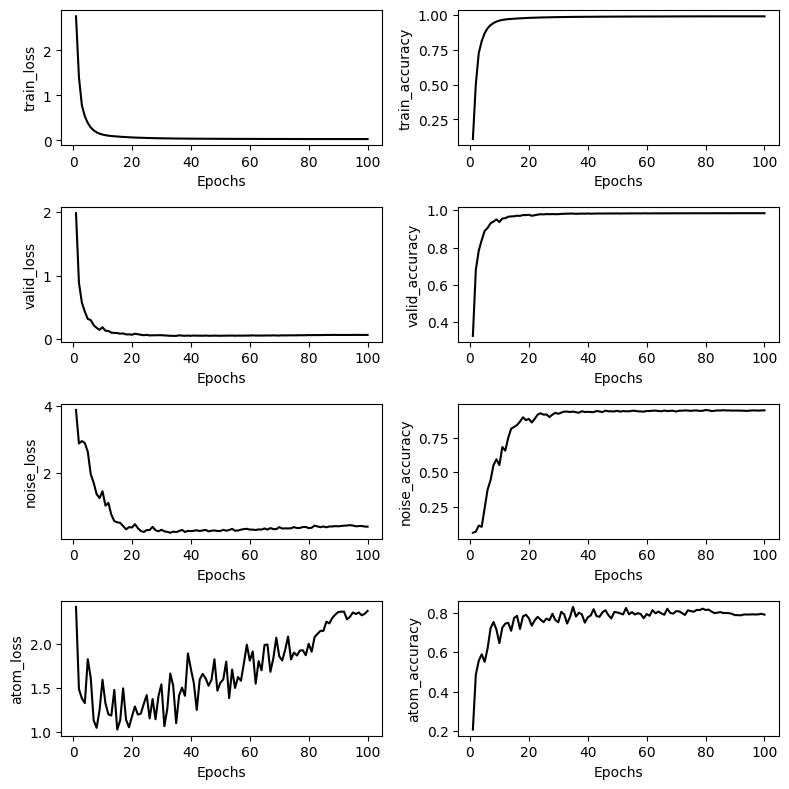

In [2]:
training_specs['ds_size'] = 2000000
training_specs['folder_name'] = task_name + '-2m'
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 5 million dataset

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: yig319 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Epoch: 1/40


Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:16:25<00:00,  1.10s/it]


train_loss: 1.7212, train_accuracy: 42.85%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [10:59<00:00,  1.58it/s]


valid_loss: 0.5268, valid_accuracy: 79.86%
Model saved at epoch 0
Saved new best model at epoch 0 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [09:09<00:00,  1.52it/s]


noise_loss: 2.7001, noise_accuracy: 14.52%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:56<00:00,  1.56it/s]


atom_loss: 1.4080, atom_accuracy: 54.97%
Model saved at epoch 1
Epoch: 2/40


Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:20:17<00:00,  1.16s/it]


train_loss: 0.3995, train_accuracy: 86.24%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [10:51<00:00,  1.60it/s]


valid_loss: 0.2707, valid_accuracy: 91.30%
Model saved at epoch 1
Saved new best model at epoch 1 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [09:02<00:00,  1.54it/s]


noise_loss: 1.6505, noise_accuracy: 45.30%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [09:05<00:00,  1.53it/s]


atom_loss: 1.4176, atom_accuracy: 63.78%
Model saved at epoch 2
Epoch: 3/40


Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:20:43<00:00,  1.16s/it]


train_loss: 0.1916, train_accuracy: 93.79%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [11:17<00:00,  1.54it/s]


valid_loss: 0.1666, valid_accuracy: 94.29%
Model saved at epoch 2
Saved new best model at epoch 2 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:54<00:00,  1.56it/s]


noise_loss: 1.2411, noise_accuracy: 58.57%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [09:22<00:00,  1.48it/s]


atom_loss: 0.9895, atom_accuracy: 72.83%
Model saved at epoch 3
Epoch: 4/40


Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:21:02<00:00,  1.17s/it]


train_loss: 0.1248, train_accuracy: 96.08%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [11:05<00:00,  1.57it/s]


valid_loss: 0.1078, valid_accuracy: 96.43%
Model saved at epoch 3
Saved new best model at epoch 3 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:51<00:00,  1.57it/s]


noise_loss: 0.8149, noise_accuracy: 74.35%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:56<00:00,  1.56it/s]


atom_loss: 1.2355, atom_accuracy: 69.86%
Model saved at epoch 4
Epoch: 5/40


Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:20:22<00:00,  1.16s/it]


train_loss: 0.0979, train_accuracy: 96.92%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [10:56<00:00,  1.59it/s]


valid_loss: 0.1083, valid_accuracy: 96.45%
Model saved at epoch 4
Saved new best model at epoch 4 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:52<00:00,  1.57it/s]


noise_loss: 0.5198, noise_accuracy: 83.67%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:52<00:00,  1.57it/s]


atom_loss: 1.2494, atom_accuracy: 70.41%
Model saved at epoch 5
Epoch: 6/40


Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:20:35<00:00,  1.16s/it]


train_loss: 0.0828, train_accuracy: 97.36%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [11:03<00:00,  1.57it/s]


valid_loss: 0.0808, valid_accuracy: 97.29%
Model saved at epoch 5
Saved new best model at epoch 5 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:50<00:00,  1.58it/s]


noise_loss: 0.3233, noise_accuracy: 88.83%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:52<00:00,  1.57it/s]


atom_loss: 0.8351, atom_accuracy: 79.34%
Model saved at epoch 6
Epoch: 7/40


Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:20:44<00:00,  1.16s/it]


train_loss: 0.0734, train_accuracy: 97.63%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [11:22<00:00,  1.53it/s]


valid_loss: 0.0659, valid_accuracy: 97.74%
Model saved at epoch 6
Saved new best model at epoch 6 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [09:05<00:00,  1.53it/s]


noise_loss: 0.2287, noise_accuracy: 91.59%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:57<00:00,  1.55it/s]


atom_loss: 0.7075, atom_accuracy: 81.81%
Model saved at epoch 7
Epoch: 8/40


Train: 100%|█████████████████████████████████████████████████████████████████████▋| 4152/4167 [1:20:33<00:17,  1.18s/it]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:21:01<00:00,  1.17s/it]


train_loss: 0.0474, train_accuracy: 98.36%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [11:11<00:00,  1.55it/s]


valid_loss: 0.0453, valid_accuracy: 98.38%
Model saved at epoch 12
Saved new best model at epoch 12 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:58<00:00,  1.55it/s]


noise_loss: 0.1681, noise_accuracy: 94.10%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [09:02<00:00,  1.54it/s]


atom_loss: 0.9190, atom_accuracy: 80.60%
Model saved at epoch 13
Epoch: 14/40


Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:21:26<00:00,  1.17s/it]


train_loss: 0.0453, train_accuracy: 98.43%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [11:17<00:00,  1.54it/s]


valid_loss: 0.0467, valid_accuracy: 98.36%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [09:01<00:00,  1.54it/s]


noise_loss: 0.1643, noise_accuracy: 94.66%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:57<00:00,  1.55it/s]


atom_loss: 0.8379, atom_accuracy: 82.33%
Model saved at epoch 14
Epoch: 15/40


Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:21:25<00:00,  1.17s/it]


train_loss: 0.0438, train_accuracy: 98.48%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [11:11<00:00,  1.55it/s]


valid_loss: 0.0463, valid_accuracy: 98.37%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:55<00:00,  1.56it/s]


noise_loss: 0.1566, noise_accuracy: 94.88%


Valid:  95%|██████████████████████████████████████████████████████████████████████▋   | 797/835 [08:38<00:24,  1.58it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:21:06<00:00,  1.17s/it]


train_loss: 0.0401, train_accuracy: 98.58%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [11:03<00:00,  1.57it/s]


valid_loss: 0.0438, valid_accuracy: 98.46%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:41<00:00,  1.60it/s]


noise_loss: 0.1540, noise_accuracy: 95.41%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:43<00:00,  1.60it/s]


atom_loss: 1.0435, atom_accuracy: 81.99%
Model saved at epoch 18
Epoch: 19/40


Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:20:54<00:00,  1.16s/it]


train_loss: 0.0393, train_accuracy: 98.60%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [11:11<00:00,  1.55it/s]


valid_loss: 0.0432, valid_accuracy: 98.49%
Model saved at epoch 18
Saved new best model at epoch 18 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:38<00:00,  1.61it/s]


noise_loss: 0.1520, noise_accuracy: 95.60%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:38<00:00,  1.61it/s]


atom_loss: 1.1876, atom_accuracy: 81.15%
Model saved at epoch 19
Epoch: 20/40


Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:20:52<00:00,  1.16s/it]


train_loss: 0.0384, train_accuracy: 98.63%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [11:13<00:00,  1.55it/s]


valid_loss: 0.0417, valid_accuracy: 98.52%
Model saved at epoch 19
Saved new best model at epoch 19 with valid dataset


Valid:  17%|████████████▊                                                             | 144/835 [01:33<07:10,  1.61it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [11:23<00:00,  1.53it/s]


valid_loss: 0.0417, valid_accuracy: 98.58%
Model saved at epoch 25
Saved new best model at epoch 25 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:59<00:00,  1.55it/s]


noise_loss: 0.2049, noise_accuracy: 95.75%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:56<00:00,  1.56it/s]


atom_loss: 1.2125, atom_accuracy: 84.27%
Model saved at epoch 26
Epoch: 27/40


Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:21:46<00:00,  1.18s/it]


train_loss: 0.0342, train_accuracy: 98.76%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [11:27<00:00,  1.52it/s]


valid_loss: 0.0431, valid_accuracy: 98.56%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [09:07<00:00,  1.52it/s]


noise_loss: 0.1972, noise_accuracy: 95.98%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:51<00:00,  1.57it/s]


atom_loss: 1.4803, atom_accuracy: 82.48%
Model saved at epoch 27
Epoch: 28/40


Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:20:48<00:00,  1.16s/it]


train_loss: 0.0338, train_accuracy: 98.77%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [11:13<00:00,  1.55it/s]


valid_loss: 0.0421, valid_accuracy: 98.59%
Model saved at epoch 27
Saved new best model at epoch 27 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:57<00:00,  1.55it/s]


noise_loss: 0.1881, noise_accuracy: 96.19%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:50<00:00,  1.57it/s]


atom_loss: 1.3340, atom_accuracy: 84.42%
Model saved at epoch 28
Epoch: 29/40


Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:21:25<00:00,  1.17s/it]


train_loss: 0.0334, train_accuracy: 98.79%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [11:22<00:00,  1.53it/s]


valid_loss: 0.0430, valid_accuracy: 98.58%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [09:01<00:00,  1.54it/s]


noise_loss: 0.2109, noise_accuracy: 96.06%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:50<00:00,  1.58it/s]


atom_loss: 1.2250, atom_accuracy: 84.87%
Model saved at epoch 29
Epoch: 30/40


Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:21:54<00:00,  1.18s/it]


train_loss: 0.0331, train_accuracy: 98.80%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [11:32<00:00,  1.50it/s]


valid_loss: 0.0426, valid_accuracy: 98.60%
Model saved at epoch 29
Saved new best model at epoch 29 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [09:31<00:00,  1.46it/s]


noise_loss: 0.2457, noise_accuracy: 95.80%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [09:09<00:00,  1.52it/s]


atom_loss: 1.5047, atom_accuracy: 83.75%
Model saved at epoch 30
Epoch: 31/40


Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:21:45<00:00,  1.18s/it]


train_loss: 0.0327, train_accuracy: 98.81%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [11:34<00:00,  1.50it/s]


valid_loss: 0.0432, valid_accuracy: 98.61%
Model saved at epoch 30
Saved new best model at epoch 30 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [09:01<00:00,  1.54it/s]


noise_loss: 0.2443, noise_accuracy: 95.84%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:54<00:00,  1.56it/s]


atom_loss: 1.3110, atom_accuracy: 85.51%
Model saved at epoch 31
Epoch: 32/40


Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:21:13<00:00,  1.17s/it]


train_loss: 0.0325, train_accuracy: 98.82%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [11:17<00:00,  1.54it/s]


valid_loss: 0.0438, valid_accuracy: 98.61%
Model saved at epoch 31
Saved new best model at epoch 31 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:52<00:00,  1.57it/s]


noise_loss: 0.2297, noise_accuracy: 96.13%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:42<00:00,  1.60it/s]


atom_loss: 1.3438, atom_accuracy: 86.17%
Model saved at epoch 32
Epoch: 33/40


Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:21:05<00:00,  1.17s/it]


train_loss: 0.0323, train_accuracy: 98.82%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [11:15<00:00,  1.54it/s]


valid_loss: 0.0439, valid_accuracy: 98.62%
Model saved at epoch 32
Saved new best model at epoch 32 with valid dataset


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:54<00:00,  1.56it/s]


noise_loss: 0.2416, noise_accuracy: 96.10%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [08:53<00:00,  1.57it/s]


atom_loss: 1.2868, atom_accuracy: 86.46%
Model saved at epoch 33
Epoch: 34/40


Train:  77%|█████████████████████████████████████████████████████▊                | 3207/4167 [1:02:21<18:28,  1.15s/it]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:20:48<00:00,  1.16s/it]


train_loss: 0.0315, train_accuracy: 98.86%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [11:15<00:00,  1.54it/s]


valid_loss: 0.0455, valid_accuracy: 98.63%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [09:10<00:00,  1.52it/s]


noise_loss: 0.2615, noise_accuracy: 96.06%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [09:16<00:00,  1.50it/s]


atom_loss: 1.3732, atom_accuracy: 86.72%
Model saved at epoch 39
Epoch: 40/40


Train: 100%|██████████████████████████████████████████████████████████████████████| 4167/4167 [1:22:11<00:00,  1.18s/it]


train_loss: 0.0315, train_accuracy: 98.87%


Valid: 100%|████████████████████████████████████████████████████████████████████████| 1042/1042 [11:21<00:00,  1.53it/s]


valid_loss: 0.0454, valid_accuracy: 98.63%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [09:10<00:00,  1.52it/s]


noise_loss: 0.2517, noise_accuracy: 96.16%


Valid: 100%|██████████████████████████████████████████████████████████████████████████| 835/835 [09:19<00:00,  1.49it/s]


atom_loss: 1.3444, atom_accuracy: 86.92%
Model saved at epoch 40


atom_accuracy,▂▂▁▁▁▅▆▄▄▄▄▅▄▄▅▄▅▅▅▆▇▆▆▅▅▄▅▆▇▆▇▇█▇█▇▇██▇
atom_loss,▅▆▁▃▃▂▃▁▂▃▂▃▃▃▂▄▅▆▇█▇█▆▆▅█▅▇▄▄█▄▅▇▄▅▇▆▆▅
epoch,▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇███
noise_accuracy,▁▁▁▄▅▆▆▇▇▇██████████████████████████████
noise_loss,█▆▆▆▃▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▁▁▁▂▁▁▂▁▂▂
records,▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇████
train_accuracy,▁▃▃▅▇███▇███████████████████████████████
train_loss,█▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_accuracy,▁▅▅▆▇▇█▇█▇▇█████████████████████████████
valid_loss,██▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▂▂▂▁▁▁
atom_accuracy,0.86921


{'epoch': [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 36, 37, 37, 37, 37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40], 'train_loss': [1.7211941556787491, 0.3994932779371738, 0.1915863569188118, 0.12481258024930954, 0.09790553689658642, 0.08284836538732052, 0.07336934224635362, 0.0660423529368639, 0.06050080398470163, 0.056238302498161793, 0.05271282473489642, 0.04981542203471065, 0.047413947932720184, 0.04528673429019749, 0.04378929900601506, 0.042315670851618054, 0.04112076818667352, 0.04005428957

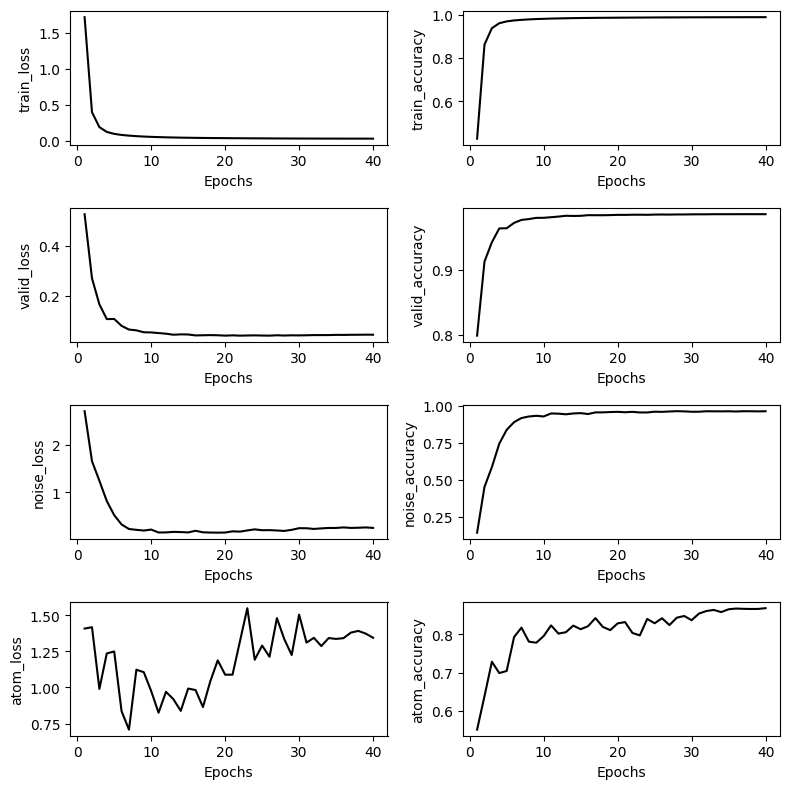

In [3]:
training_specs['ds_size'] = 5000000
training_specs['folder_name'] = task_name + '-5m'
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)